In [ ]:
!pip install -q -U google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.4/206.4 kB 9.1 MB/s eta 0:00:00


In [ ]:
from google import genai
import textwrap
from IPython.display import Markdown, display

In [ ]:
def to_markdown(text):
  # text=text.replace('.','*')
  return Markdown(textwrap.indent(text,'> ',predicate=lambda _:True))

In [ ]:
to_markdown("Hello . is here")

> Hello * is here

###Generate Text from Text input

In [ ]:
from google.colab import userdata

In [ ]:
my_key=userdata.get('my_key')

In [ ]:
client = genai.Client(api_key=my_key)

In [ ]:
# print(client.models.list())
for model in client.models.list():
  if 'generateContent' in model.supported_actions:
    print(model.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash
models/gemini-2.5-flash-preview-04-17-thinking
models/gemini-2.5-flash-lite-preview-06-17
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-p

In [ ]:
%%time
response = client.models.generate_content(
    model="gemini-2.5-flash", contents="who is virat kohli",
)

CPU times: user 36.9 ms, sys: 7.11 ms, total: 44 ms
Wall time: 9.03 s


In [ ]:
print(response)

candidates=[Candidate(content=Content(parts=[Part(video_metadata=None, thought=None, inline_data=None, file_data=None, thought_signature=None, code_execution_result=None, executable_code=None, function_call=None, function_response=None, text='Virat Kohli is an Indian international cricketer who is widely regarded as one of the greatest batsmen of all time.\n\nHere\'s a breakdown of who he is:\n\n1.  **Cricketer:** He is a right-handed top-order batsman.\n2.  **Indian International Player:** He represents India in all three formats of the game: Test matches, One Day Internationals (ODIs), and Twenty20 Internationals (T20Is).\n3.  **Former Captain:** He captained the Indian national team in all three formats for a significant period, leading them to many victories and achieving the No. 1 ranking in Test cricket.\n4.  **Batting Maestro:** He holds numerous batting records, including:\n    *   The highest run-scorer in T20 International history.\n    *   The most centuries in One Day Inter

In [ ]:
display(Markdown(response.text))

Virat Kohli is an Indian international cricketer who is widely regarded as one of the greatest batsmen of all time.

Here's a breakdown of who he is:

1.  **Cricketer:** He is a right-handed top-order batsman.
2.  **Indian International Player:** He represents India in all three formats of the game: Test matches, One Day Internationals (ODIs), and Twenty20 Internationals (T20Is).
3.  **Former Captain:** He captained the Indian national team in all three formats for a significant period, leading them to many victories and achieving the No. 1 ranking in Test cricket.
4.  **Batting Maestro:** He holds numerous batting records, including:
    *   The highest run-scorer in T20 International history.
    *   The most centuries in One Day International cricket, surpassing Sachin Tendulkar's long-standing record.
    *   Being one of the few batsmen to have scored over 10,000 runs in both ODI and Test cricket.
    *   Known for his exceptional consistency, especially in run-chases, earning him the nickname "Chase Master."
5.  **Modern Icon:** Kohli is celebrated for his aggressive yet classical style of play, his intense dedication to fitness, and his passionate, competitive spirit on the field. He has inspired a generation of cricketers and fans globally.
6.  **Global Celebrity:** Beyond cricket, he is a massive sports icon with a huge social media following and numerous endorsements, making him one of the most recognizable athletes in the world.
7.  **Personal Life:** He is married to popular Bollywood actress Anushka Sharma, and they have two children.

In summary, Virat Kohli is a legendary Indian cricketer who has redefined batting standards and leadership in modern cricket, leaving an indelible mark on the sport.

In [ ]:
response.candidates

[Candidate(content=Content(parts=[Part(video_metadata=None, thought=None, inline_data=None, file_data=None, thought_signature=None, code_execution_result=None, executable_code=None, function_call=None, function_response=None, text='Virat Kohli is an Indian international cricketer who is widely regarded as one of the greatest batsmen of all time.\n\nHere\'s a breakdown of who he is:\n\n1.  **Cricketer:** He is a right-handed top-order batsman.\n2.  **Indian International Player:** He represents India in all three formats of the game: Test matches, One Day Internationals (ODIs), and Twenty20 Internationals (T20Is).\n3.  **Former Captain:** He captained the Indian national team in all three formats for a significant period, leading them to many victories and achieving the No. 1 ranking in Test cricket.\n4.  **Batting Maestro:** He holds numerous batting records, including:\n    *   The highest run-scorer in T20 International history.\n    *   The most centuries in One Day International cr

In [ ]:
%%time
res=client.models.generate_content_stream(
    model="gemini-2.5-flash",
    contents="who is virat kohli"
)

CPU times: user 8 µs, sys: 2 µs, total: 10 µs
Wall time: 13.1 µs


In [ ]:
for chunk in res:
  print(chunk.text,end='\n ------------\n')

**Virat Kohli** is an Indian
 ------------
 international cricketer, widely regarded as one of the greatest batsmen of all time and a global icon of the sport.

Here's a breakdown of who he is:

1.  **Indian Cricketer:** He represents the Indian national cricket team.
 ------------

2.  **Right-Handed Top-Order Batsman:** He primarily bats at positions 3 or 4, known for his aggressive yet technically sound style.
3.  **Record-Breaker:**
    *   
 ------------
He holds numerous batting records, particularly in One Day Internationals (ODIs), including being the **fastest to many milestones** (e.g., 8,000, 9,000, 10,00
 ------------
0, 11,000, 12,000, 13,000 ODI runs).
    *   He holds the record for the **most centuries in ODI history**, surpassing Sachin Tendulkar.
 ------------

    *   He is among the leading run-scorers in T20 Internationals as well.
    *   His consistency across all three formats (Tests, ODIs, and T20Is) is remarkable.
4.  
 ------------
**Former Captain:** Kohli h

###generate text from image inputs

In [ ]:
!curl -o img1.jpg https://images.squarespace-cdn.com/content/v1/63f685fbb8126e44fea875b9/1719448336456-OANXC93WR3S32143IC3F/ranthambore-tiger-male-1-%C2%A92024-greg-garthe-allnaturalimages.com.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  142k  100  142k    0     0   427k      0 --:--:-- --:--:-- --:--:--  428k


In [ ]:
!curl -o img2.jpg https://rukminim2.flixcart.com/image/750/900/jve4pe80/plant-seed/g/v/k/10-lotus-blue-bio-kisan-original-imaf8zy39ah7bcaj.jpeg?q=90&crop=false

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 88279    0 88279    0     0   326k      0 --:--:-- --:--:-- --:--:--  327k


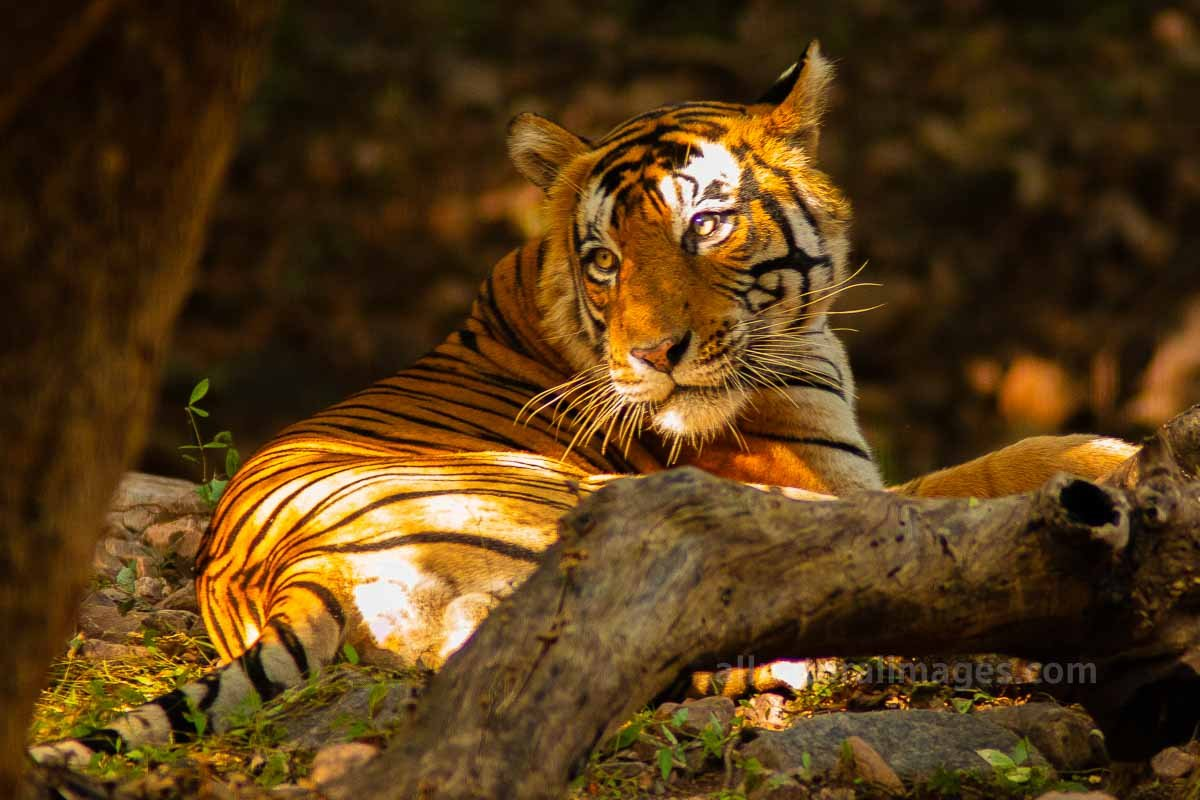

In [ ]:
from PIL import Image

img1 = Image.open('img1.jpg')
img1



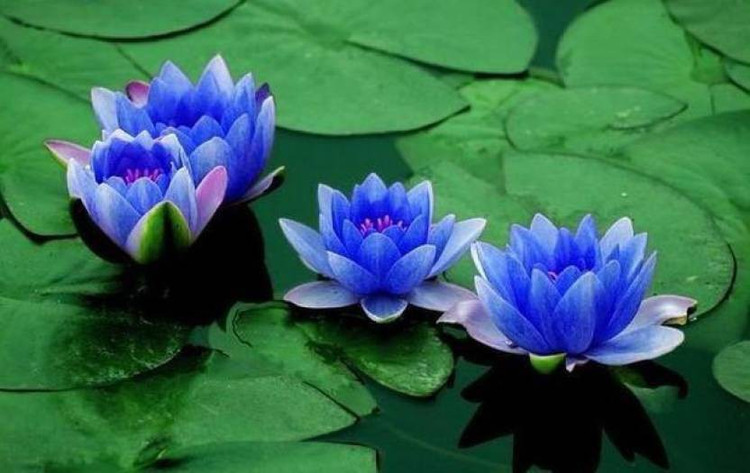

In [ ]:
img2=Image.open('img2.jpg')
img2

In [ ]:
%%time
res=client.models.generate_content(
    model='gemini-2.5-flash',
    contents=img1
)

CPU times: user 41.2 ms, sys: 2.35 ms, total: 43.6 ms
Wall time: 8.3 s


In [ ]:
display(Markdown(res.text))

This captivating image features a majestic tiger resting in its natural habitat, bathed in what appears to be the warm, golden light of either dawn or dusk.

The tiger, the central focus of the photograph, is captured in a relaxed, recumbent posture, lying on the forest floor. Its body is partially visible, extending from its head and shoulders to its lower back and part of its tail. The characteristic orange fur with bold black stripes is vividly rendered, with the sunlight highlighting the contours of its muscular form and the distinct patterns of its coat.

The tiger's head is turned slightly to its right, with its gaze directed towards the viewer but slightly off to the side, giving it an alert yet contemplative expression. Its piercing eyes, a striking blend of amber and gold, catch the light beautifully, creating a glint that adds to its intense presence. The white fur around its muzzle and under its eyes contrasts sharply with the darker stripes on its forehead and around its eyes. Its long, sensitive whiskers fan out from its snout, prominently catching the light.

The lighting in the image is a significant element, casting long shadows and creating a rich, warm palette. Parts of the tiger's body, particularly its face and back, are brightly illuminated, while other areas, such as its left side and the background, fall into softer shadows, adding depth and dimension.

The environment appears to be a dense forest or jungle. In the foreground, a gnarled, dark tree trunk or large log lies horizontally, partially obscuring the tiger's lower body but also framing the scene. Small patches of green vegetation and scattered rocks are visible on the earthy ground. The background is a soft blur of dark browns and greens, hinting at the dense foliage and trees, providing a natural, unobtrusive backdrop that keeps the focus firmly on the magnificent creature.

Overall, the photograph captures a moment of quiet majesty, showcasing the tiger's beauty and power within its natural, sun-dappled surroundings.

In [ ]:
%%time
res=client.models.generate_content(
    model='gemini-2.5-flash',
    contents=['write a short story on the images i provided.',img1,img2]
)

CPU times: user 69.6 ms, sys: 9.63 ms, total: 79.2 ms
Wall time: 17.9 s


In [ ]:
display(Markdown(res.text))

The sultry midday sun beat down on the ancient forests of Ranthambore, painting the undergrowth in shifting patterns of gold and shadow. Ranthambore, a tiger of immense power and striking beauty, lay stretched by a gnarled root, his orange and black stripes a masterpiece of camouflage against the dappled light. His amber eyes, usually sharp with the hunt, held a rare, contemplative glint, perhaps from the oppressive heat, or perhaps from a deeper, unspoken weariness that even the jungle's fiercest ruler could feel. He watched the unseen world with a patient stillness, a living embodiment of wild grace and formidable strength.

A thirst, more profound than mere dehydration, stirred within him. He rose, a ripple of muscle beneath taut fur, and moved with silent, fluid power deeper into the emerald labyrinth. His usual path led to familiar watering holes, but today, an instinct, a faint, sweet scent carried on the humid air, pulled him off course. He wound through dense thickets, past ancient banyans whose roots plunged deep into the earth, until the air grew cooler, heavier with the scent of damp earth and unseen blossoms.

Then, he stopped. Before him lay a hidden pond, its surface a mirror to the sky, fringed by whispering reeds. And there, nestled amongst the broad, green lily pads, floated a cluster of flowers unlike any he had ever seen. Their petals were an unearthly, vivid blue, so deep and pure they seemed to absorb the light, yet glow from within. Four sapphire jewels, each perfectly formed, rested on the water's surface, their delicate beauty a stark contrast to the untamed wilderness around them. They were water lilies, but of a hue so rare, they seemed born of a dream.

Ranthambore approached the water's edge, not with the stealth of a hunter, but with the quiet reverence of an observer. He lowered his magnificent head, drinking deeply of the cool, clear water. As he drank, his gaze remained fixed on the blue lotuses. The fierce intensity in his eyes softened, replaced by a quiet wonder. These blossoms, so fragile yet so vibrant, seemed to hum with a silent peace, a tranquility that seeped into the very air around them.

For a long moment, the king of the jungle remained there, not hunting, not asserting dominance, but simply being. The blue lotuses, untouched by his power, continued to float, perfect and serene. In that hidden glade, under the watchful gaze of the striped predator, beauty and strength found a moment of unexpected harmony.

As the sun began its descent, casting long shadows, Ranthambore rose, his powerful form once again a silhouette of dominance. But as he melted back into the emerald depths, a subtle shift remained within him. The memory of the sapphire blooms, a momentary respite, a whisper of quiet beauty in his wild heart, would linger, a secret held between the mighty tiger and the tranquil blue lotuses of the hidden pond.

###Configuration

In [ ]:
from google.genai import types

In [ ]:
conf=types.GenerateContentConfig(
      system_instruction='you are a professional assistent for suggesting professional company name',
      candidate_count=1,
      max_output_tokens= 200,
      top_k= 2,
      top_p= 0.5,
      temperature= 0.7,
      response_mime_type= 'application/json',
      # stop_sequences= ["\n"],
      # seed=42,
)

In [ ]:
%%time
res=client.models.generate_content(
    model='gemini-2.5-flash',
    contents='I am going to start my startup related to the tech so suggest me some names for it',
    config=conf,
)

CPU times: user 13.4 ms, sys: 1.64 ms, total: 15 ms
Wall time: 2.16 s


In [ ]:
res.text

'[\n  "Innovatech",\n  "NexGen Solutions",\n  "Quantum Leap Tech",\n  "Synapse Digital",\n  "Apex Innovations",\n  '

In [ ]:
display(Markdown(res.text.replace(',','\n')))

[
  "Innovatech"

  "NexGen Solutions"

  "Quantum Leap Tech"

  "Synapse Digital"

  "Apex Innovations"

  

In [ ]:
res.candidates

[Candidate(content=Content(parts=[Part(video_metadata=None, thought=None, inline_data=None, file_data=None, thought_signature=None, code_execution_result=None, executable_code=None, function_call=None, function_response=None, text='[\n  "Innovatech",\n  "NexGen Solutions",\n  "Quantum Leap Tech",\n  "Synapse Digital",\n  "Apex Innovations",\n  ')], role='model'), citation_metadata=None, finish_message=None, token_count=None, finish_reason=<FinishReason.MAX_TOKENS: 'MAX_TOKENS'>, url_context_metadata=None, avg_logprobs=None, grounding_metadata=None, index=0, logprobs_result=None, safety_ratings=None)]

In [ ]:
conf=types.GenerateContentConfig(
      system_instruction='you are a professional assistent for suggesting professional company name',
      candidate_count=1,
      # max_output_tokens= 200,
      top_k= 2,
      top_p= 0.5,
      temperature= 0.7,
      # response_mime_type= 'application/json',
      # stop_sequences= ["\n"],
      # seed=42,
)

In [ ]:
%%time
res=client.models.generate_content(
    model='gemini-2.5-flash',
    contents='I am going to start my startup related to the tech so suggest me some names for it',
    config=conf,
)

CPU times: user 49.4 ms, sys: 7.98 ms, total: 57.3 ms
Wall time: 16.3 s


In [ ]:
display(Markdown(res.text))

That's exciting! Choosing a name for a tech startup is a crucial step. It should be memorable, relevant, and ideally, have an available domain name.

To give you the best suggestions, I'll categorize them based on different vibes and common tech naming conventions.

---

### **Modern & Abstract (Short, Punchy, Often Invented Words)**

These names are often unique, easy to brand, and can grow with your company even if your focus shifts slightly.

1.  **AuraTech** (Implies a pervasive, intelligent presence)
2.  **VeloSys** (From "velocity" - implies speed and efficiency)
3.  **Kinetix** (From "kinetic" - implies movement, energy, and dynamism)
4.  **Synapse AI** (Relates to neural connections, good for AI/ML)
5.  **Fluxion** (Implies continuous change, flow, and innovation)
6.  **NovaCore** (New core, central innovation)
7.  **Veridian Labs** (Green/fresh, implying growth and newness)
8.  **Luminaryx** (Suggests enlightenment, leading the way)
9.  **QuantaFlow** (Relates to quantum, small, precise, powerful units of data/energy)
10. **NexusPoint** (A central connection point)

---

### **Descriptive & Functional (Hint at what you do)**

These names give a clearer idea of your business, but still sound professional and modern.

11. **LogicStream** (For data, analytics, or process automation)
12. **ByteWorks** (Classic tech feel, for software development, data solutions)
13. **PixelForge** (Good for design, digital media, or visual tech)
14. **CodeCraft Solutions** (For custom software, development services)
15. **DataSense AI** (For AI-driven data insights)
16. **Connective Systems** (For networking, IoT, or integration platforms)
17. **OptiMind Tech** (For optimization, AI, or smart solutions)
18. **InsightCore** (For analytics, business intelligence, or research tech)
19. **CloudVerse** (If you're heavily cloud-based)
20. **SecureSphere** (If cybersecurity is a focus)

---

### **Evocative & Conceptual (Inspire a feeling or idea)**

These names aim to evoke a sense of innovation, future, or impact.

21. **Ascend Digital** (Implies growth, rising above)
22. **Catalyst Labs** (Suggests driving change and innovation)
23. **Pioneer Tech** (For breaking new ground)
24. **Zenith Solutions** (Reaching the peak, highest point)
25. **Meridian Digital** (A point of culmination, direction, or peak performance)
26. **Horizon Labs** (Looking forward, expanding possibilities)
27. **Echo Systems** (For replication, spread, or impact)
28. **Verve Innovations** (Energy, enthusiasm, spirit)
29. **Genesis Tech** (Beginning, creation, foundational)
30. **Quantum Leap AI** (For significant advancements, especially in AI)

---

### **Short & Catchy (Easy to remember and pronounce)**

These are often single words or very short combinations.

31. **Velo**
32. **Syn**
33. **Flux**
34. **Aura**
35. **Core**
36. **Grid**
37. **Spark**
38. **Node**
39. **Link**
40. **Echo**

---

### **Key Considerations When Choosing:**

*   **Domain Availability:** Check if the `.com` (and other relevant TLDs like `.io`, `.tech`, `.ai`) is available. This is crucial.
*   **Trademark Check:** Do a quick search to ensure the name isn't already trademarked in your industry.
*   **Memorability & Pronunciation:** Is it easy to say, spell, and remember?
*   **Relevance:** Does it align with your company's mission and values?
*   **Scalability:** Will the name still make sense if your company expands or pivots its services in the future?
*   **Target Audience:** Who are you trying to reach? Does the name resonate with them?
*   **Visual Appeal:** How would it look as a logo?

Good luck with your startup! Let me know if you'd like more specific suggestions based on your niche within tech (e.g., AI, SaaS, hardware, cybersecurity, etc.).

###Chat

In [ ]:
chat=client.chats.create(model='gemini-2.5-flash')

In [ ]:
res=chat.send_message('tell me about the IIT Bhilai')

In [ ]:
display(Markdown(res.text))

The Indian Institute of Technology Bhilai (IIT Bhilai) is one of the newer IITs established by the Ministry of Education, Government of India. Here's a detailed overview:

**1. Establishment and History:**
*   **Year of Establishment:** IIT Bhilai was established in **2016**, as part of the third phase of new IITs announced by the Government of India.
*   **Mentoring Institute:** It was initially mentored by **IIT Hyderabad**, which provided guidance for its academic programs, curriculum design, faculty recruitment, and administrative procedures in its formative years.

**2. Location:**
*   **Temporary Campus:** For its initial years (2016-2023), IIT Bhilai operated from a temporary campus within the Government Engineering College (GEC) Raipur premises.
*   **Permanent Campus:** The institute is now transitioning and largely operating from its sprawling permanent campus located in **Kutelabhata, Bhilai, Durg district, Chhattisgarh**. The permanent campus is being developed in phases, with significant infrastructure already in place.

**3. Academic Programs:**
IIT Bhilai offers a range of undergraduate, postgraduate, and doctoral programs:

*   **B.Tech (Bachelor of Technology):**
    *   Computer Science and Engineering (CSE)
    *   Electrical Engineering (EE)
    *   Mechanical Engineering (ME)
    *   Civil Engineering (CE)
    *   Material Science and Metallurgical Engineering (MSME)
    *   Chemical Engineering (ChE)
    *   Data Science and Artificial Intelligence (DSAI) - (Newer specialisation)
*   **M.Tech (Master of Technology):** Offered in various specializations under the engineering departments.
*   **PhD (Doctor of Philosophy):** Available in all the engineering disciplines as well as in Sciences (Physics, Chemistry, Mathematics) and Humanities & Social Sciences.

**4. Campus and Infrastructure:**
The permanent campus, though still under development, is designed to be state-of-the-art:
*   **Academic Buildings:** Modern lecture halls, tutorial rooms, and departmental blocks.
*   **Laboratories:** Well-equipped research and teaching labs with advanced instrumentation.
*   **Central Library:** A growing collection of books, journals, and digital resources.
*   **Hostels:** Separate hostels for male and female students with modern amenities.
*   **Faculty and Staff Housing:** Residential complexes for faculty and staff.
*   **Sports Facilities:** Grounds for various outdoor sports (cricket, football, basketball, volleyball) and indoor sports facilities.
*   **Auditorium and Convention Centre:** For events, seminars, and cultural activities.
*   **Student Activity Centre:** Spaces for student clubs and recreational activities.
*   **Amenities:** Canteen, medical facilities, banking services, etc.

**5. Faculty:**
*   IIT Bhilai boasts a team of highly qualified and dedicated faculty members, many with international exposure and significant research experience.
*   The faculty is actively involved in research, publishing in reputed journals, and attracting research grants.

**6. Research and Innovation:**
*   Being a new IIT, it has a strong focus on building a robust research ecosystem from the ground up.
*   Emphasis is placed on interdisciplinary research, collaborating with industry, and addressing real-world problems.
*   Focus areas include Data Science, AI/ML, Robotics, Advanced Materials, Sustainable Technologies, etc.

**7. Student Life and Culture:**
*   **Clubs and Societies:** A vibrant student community with numerous technical, cultural, and sports clubs (e.g., Coding Club, Robotics Club, Dramatics Club, Music Club, Photography Club).
*   **Fests:** The institute organizes various annual events, including its techno-cultural fest, **"Aavartan,"** which attracts participation from colleges across the region.
*   **Student Council:** An active student body that plays a significant role in organizing events and representing student interests.

**8. Location Advantage:**
*   Bhilai is known as the "Steel City" and is a major industrial hub, home to the Bhilai Steel Plant (BSP), a flagship unit of SAIL. This proximity offers potential opportunities for industry-academia collaboration, internships, and practical exposure for students.

**9. Vision and Future:**
IIT Bhilai aims to emerge as a premier institution for engineering education and research, fostering innovation, entrepreneurship, and contributing to the technological and economic development of the region and the nation. As a young institution, it offers a dynamic environment where students have the unique opportunity to contribute to shaping its culture and future trajectory.

In essence, IIT Bhilai is a rapidly growing institution with modern infrastructure, a dedicated faculty, and a vibrant student community, striving to make its mark in the landscape of technical education in India.

In [ ]:
res2=chat.send_message('tell me its foundation day')

In [ ]:
display(Markdown(res2.text))

The Indian Institute of Technology Bhilai (IIT Bhilai) officially commenced its operations and welcomed its first batch of students on **August 1, 2016**.

Therefore, its **Foundation Day** is celebrated on **August 1st** each year, marking the beginning of its academic journey. It began operations from its temporary campus at the Government Engineering College (GEC) Raipur.

In [ ]:
chat.get_history()

[UserContent(parts=[Part(video_metadata=None, thought=None, inline_data=None, file_data=None, thought_signature=None, code_execution_result=None, executable_code=None, function_call=None, function_response=None, text='tell me about the IIT Bhilai')], role='user'),
 Content(parts=[Part(video_metadata=None, thought=None, inline_data=None, file_data=None, thought_signature=None, code_execution_result=None, executable_code=None, function_call=None, function_response=None, text='The Indian Institute of Technology Bhilai (IIT Bhilai) is one of the newer IITs established by the Ministry of Education, Government of India. Here\'s a detailed overview:\n\n**1. Establishment and History:**\n*   **Year of Establishment:** IIT Bhilai was established in **2016**, as part of the third phase of new IITs announced by the Government of India.\n*   **Mentoring Institute:** It was initially mentored by **IIT Hyderabad**, which provided guidance for its academic programs, curriculum design, faculty recruit

In [ ]:
for his in chat.get_history():
  # print(his.role,' : ',his.parts[0].text)
  # print("-"*100)
  display(to_markdown(f"**{his.role}** : {his.parts[0].text}"))

> **user** : tell me about the IIT Bhilai

> **model** : The Indian Institute of Technology Bhilai (IIT Bhilai) is one of the newer IITs established by the Ministry of Education, Government of India. Here's a detailed overview:
> 
> **1. Establishment and History:**
> *   **Year of Establishment:** IIT Bhilai was established in **2016**, as part of the third phase of new IITs announced by the Government of India.
> *   **Mentoring Institute:** It was initially mentored by **IIT Hyderabad**, which provided guidance for its academic programs, curriculum design, faculty recruitment, and administrative procedures in its formative years.
> 
> **2. Location:**
> *   **Temporary Campus:** For its initial years (2016-2023), IIT Bhilai operated from a temporary campus within the Government Engineering College (GEC) Raipur premises.
> *   **Permanent Campus:** The institute is now transitioning and largely operating from its sprawling permanent campus located in **Kutelabhata, Bhilai, Durg district, Chhattisgarh**. The permanent campus is being developed in phases, with significant infrastructure already in place.
> 
> **3. Academic Programs:**
> IIT Bhilai offers a range of undergraduate, postgraduate, and doctoral programs:
> 
> *   **B.Tech (Bachelor of Technology):**
>     *   Computer Science and Engineering (CSE)
>     *   Electrical Engineering (EE)
>     *   Mechanical Engineering (ME)
>     *   Civil Engineering (CE)
>     *   Material Science and Metallurgical Engineering (MSME)
>     *   Chemical Engineering (ChE)
>     *   Data Science and Artificial Intelligence (DSAI) - (Newer specialisation)
> *   **M.Tech (Master of Technology):** Offered in various specializations under the engineering departments.
> *   **PhD (Doctor of Philosophy):** Available in all the engineering disciplines as well as in Sciences (Physics, Chemistry, Mathematics) and Humanities & Social Sciences.
> 
> **4. Campus and Infrastructure:**
> The permanent campus, though still under development, is designed to be state-of-the-art:
> *   **Academic Buildings:** Modern lecture halls, tutorial rooms, and departmental blocks.
> *   **Laboratories:** Well-equipped research and teaching labs with advanced instrumentation.
> *   **Central Library:** A growing collection of books, journals, and digital resources.
> *   **Hostels:** Separate hostels for male and female students with modern amenities.
> *   **Faculty and Staff Housing:** Residential complexes for faculty and staff.
> *   **Sports Facilities:** Grounds for various outdoor sports (cricket, football, basketball, volleyball) and indoor sports facilities.
> *   **Auditorium and Convention Centre:** For events, seminars, and cultural activities.
> *   **Student Activity Centre:** Spaces for student clubs and recreational activities.
> *   **Amenities:** Canteen, medical facilities, banking services, etc.
> 
> **5. Faculty:**
> *   IIT Bhilai boasts a team of highly qualified and dedicated faculty members, many with international exposure and significant research experience.
> *   The faculty is actively involved in research, publishing in reputed journals, and attracting research grants.
> 
> **6. Research and Innovation:**
> *   Being a new IIT, it has a strong focus on building a robust research ecosystem from the ground up.
> *   Emphasis is placed on interdisciplinary research, collaborating with industry, and addressing real-world problems.
> *   Focus areas include Data Science, AI/ML, Robotics, Advanced Materials, Sustainable Technologies, etc.
> 
> **7. Student Life and Culture:**
> *   **Clubs and Societies:** A vibrant student community with numerous technical, cultural, and sports clubs (e.g., Coding Club, Robotics Club, Dramatics Club, Music Club, Photography Club).
> *   **Fests:** The institute organizes various annual events, including its techno-cultural fest, **"Aavartan,"** which attracts participation from colleges across the region.
> *   **Student Council:** An active student body that plays a significant role in organizing events and representing student interests.
> 
> **8. Location Advantage:**
> *   Bhilai is known as the "Steel City" and is a major industrial hub, home to the Bhilai Steel Plant (BSP), a flagship unit of SAIL. This proximity offers potential opportunities for industry-academia collaboration, internships, and practical exposure for students.
> 
> **9. Vision and Future:**
> IIT Bhilai aims to emerge as a premier institution for engineering education and research, fostering innovation, entrepreneurship, and contributing to the technological and economic development of the region and the nation. As a young institution, it offers a dynamic environment where students have the unique opportunity to contribute to shaping its culture and future trajectory.
> 
> In essence, IIT Bhilai is a rapidly growing institution with modern infrastructure, a dedicated faculty, and a vibrant student community, striving to make its mark in the landscape of technical education in India.

> **user** : tell me its foundation day

> **model** : The Indian Institute of Technology Bhilai (IIT Bhilai) officially commenced its operations and welcomed its first batch of students on **August 1, 2016**.
> 
> Therefore, its **Foundation Day** is celebrated on **August 1st** each year, marking the beginning of its academic journey. It began operations from its temporary campus at the Government Engineering College (GEC) Raipur.

In [ ]:
from google.genai.types import HttpOptions, ModelContent, Part, UserContent

In [ ]:
chat2=client.chats.create(
    model="gemini-2.5-flash",
    history=[],
)

In [ ]:
res2=chat2.send_message("tell me about the IPL")

In [ ]:
display(Markdown(res.text))

The **Indian Premier League (IPL)** is a professional Twenty20 (T20) cricket league in India, generally contested between March and May of every year by ten city-based franchise teams.

Here's a detailed breakdown of what makes the IPL so significant:

1.  **Format:** It's a Twenty20 (T20) league, meaning each team bats for a maximum of 20 overs. This format is known for its fast-paced, high-scoring, and thrilling nature, making it very spectator-friendly.

2.  **Founding and Ownership:**
    *   Founded by the **Board of Control for Cricket in India (BCCI)** in 2008.
    *   It was conceived by Lalit Modi, who was the first chairman and commissioner of the IPL.
    *   The league operates on a **franchise-based model**, where individual teams are owned by various corporate entities, celebrities, or consortiums (e.g., Mumbai Indians owned by Reliance Industries, Chennai Super Kings by India Cements).

3.  **Teams:** The number of teams has varied slightly over the years, but currently, there are **ten** teams:
    *   Chennai Super Kings (CSK)
    *   Delhi Capitals (DC)
    *   Gujarat Titans (GT)
    *   Kolkata Knight Riders (KKR)
    *   Lucknow Super Giants (LSG)
    *   Mumbai Indians (MI)
    *   Punjab Kings (PBKS)
    *   Rajasthan Royals (RR)
    *   Royal Challengers Bangalore (RCB)
    *   Sunrisers Hyderabad (SRH)

4.  **Player Auction:** A unique and exciting aspect of the IPL is its **player auction**. Before each season (or a major "mega auction" every few years), teams bid for players from around the world. This often leads to bidding wars and multi-million dollar contracts for top international and domestic players, making it a highly anticipated event.

5.  **Global Appeal and Star Power:**
    *   The IPL attracts the world's best cricketers from every cricketing nation (Australia, England, South Africa, West Indies, Afghanistan, etc.), playing alongside India's top domestic talent.
    *   This mix of global superstars and local heroes creates fierce competition and high-quality cricket.
    *   It's broadcast globally and has a massive international viewership, making it one of the most-watched sporting leagues in the world.

6.  **Economic Powerhouse:**
    *   The IPL is by far the **richest cricket league in the world**. It generates billions of dollars in revenue through broadcasting rights, sponsorship deals, merchandise, and ticket sales.
    *   Player salaries are among the highest in cricket, significantly boosting the earnings potential for cricketers.
    *   It has created a massive ecosystem around it, providing jobs and boosting the economy.

7.  **Impact on Indian Cricket:**
    *   **Talent Nurturing:** The IPL provides an incredible platform for young, uncapped Indian players to showcase their skills against and alongside the world's best. Many current Indian national team stars got their start or gained prominence through the IPL.
    *   **Bench Strength:** It has significantly improved the depth and quality of Indian cricket by exposing a wider pool of players to high-pressure situations.
    *   **Fitness and Professionalism:** Players are constantly pushed to maintain high fitness standards and adopt professional approaches due to the league's demands.

8.  **"Cricketainment":** The IPL is known for its blend of cricket and entertainment. Matches feature loud music, cheerleaders, celebrity attendance, dazzling opening ceremonies, and a festive atmosphere, often referred to as "Cricketainment."

9.  **History & Evolution:** Since its inception in 2008, the IPL has grown exponentially in popularity, brand value, and financial clout, overcoming early controversies (such as spot-fixing scandals and ownership issues) to become a dominant force in global sport.

In essence, the IPL is not just a cricket league; it's a global sporting phenomenon, a major economic engine, and a cultural touchstone that has redefined the landscape of cricket worldwide.

In [ ]:
chat2.get_history()

[UserContent(parts=[Part(video_metadata=None, thought=None, inline_data=None, file_data=None, thought_signature=None, code_execution_result=None, executable_code=None, function_call=None, function_response=None, text='tell me about the IPL')], role='user'),
 Content(parts=[Part(video_metadata=None, thought=None, inline_data=None, file_data=None, thought_signature=None, code_execution_result=None, executable_code=None, function_call=None, function_response=None, text='The **Indian Premier League (IPL)** is a professional Twenty20 (T20) cricket league in India, generally contested between March and May of every year by ten city-based franchise teams.\n\nHere\'s a detailed breakdown of what makes the IPL so significant:\n\n1.  **Format:** It\'s a Twenty20 (T20) league, meaning each team bats for a maximum of 20 overs. This format is known for its fast-paced, high-scoring, and thrilling nature, making it very spectator-friendly.\n\n2.  **Founding and Ownership:**\n    *   Founded by the **

###count tokens


In [ ]:
token=client.models.count_tokens(
    model='gemini-2.5-flash',
    contents='tell me about the IPL'
)

In [ ]:
token

CountTokensResponse(total_tokens=6, cached_content_token_count=None)

In [ ]:
res2.usage_metadata

GenerateContentResponseUsageMetadata(cache_tokens_details=None, cached_content_token_count=None, candidates_token_count=386, candidates_tokens_details=None, prompt_token_count=909, prompt_tokens_details=[ModalityTokenCount(modality=<MediaModality.TEXT: 'TEXT'>, token_count=909)], thoughts_token_count=984, tool_use_prompt_token_count=None, tool_use_prompt_tokens_details=None, total_token_count=2279, traffic_type=None)

In [ ]:
print(
    client.models.count_tokens(
        model="gemini-2.5-flash", contents=res2.text
    )
)

total_tokens=387 cached_content_token_count=None


In [ ]:
# Count tokens for the chat history.
print(
    client.models.count_tokens(
        model="gemini-2.0-flash", contents=chat2.get_history()
    )
)

total_tokens=1296 cached_content_token_count=None


###embeddings


In [ ]:
res = client.models.embed_content(
  model='text-embedding-004',
  contents='hello i am rajeev',

)


In [ ]:
print(res.embeddings[0].values)
print(len(res.embeddings[0].values))

[-0.027079422, -0.00953648, -0.00918256, -0.037960816, 0.023900967, 0.025835533, 0.006739373, -0.011216797, 0.0039926497, 0.065835126, -0.04174767, 0.013207238, 0.063002944, -0.033468097, 0.029495189, -0.02956419, 0.0039143744, -0.001483517, -0.08561087, -0.06444216, 0.028534347, 0.013773841, -0.04392021, 0.026162146, -0.05574643, 0.02782237, 0.0024241756, -0.029886445, 0.0040529077, -0.020125557, -0.010801841, 0.050337065, -0.03293489, -0.0060110195, 0.006368349, -0.021262417, -0.041804187, -0.031654615, 0.05944483, -0.081791505, -0.02069579, 0.044913042, -0.012452844, -0.008581891, 0.033286497, -0.08653951, 0.03469498, 0.025018672, 0.009809711, 0.047638875, 0.024623848, -0.012937328, -0.052135598, 0.023844734, 0.031233916, -0.0322233, -0.06543472, 0.06059355, 0.04276103, -0.041670244, -0.03257632, -0.017722147, 0.009720555, -0.024506597, -0.015876392, 0.012971703, 0.01933897, 0.025190556, -0.07029497, 0.006345382, 0.008570528, 0.034025077, -0.015850142, -0.007811179, -0.035499237, 0.

In [ ]:
res = client.models.embed_content(
  model='text-embedding-004',
  contents=[
      'hello i am rajeev',
      'A 3rd year student',
      'pursuing B.tech from iit bhilai',

  ],

)


In [ ]:
for emb in res.embeddings:
  print(emb.values)
  print(len(emb.values))

[-0.027079422, -0.00953648, -0.00918256, -0.037960816, 0.023900967, 0.025835533, 0.006739373, -0.011216797, 0.0039926497, 0.065835126, -0.04174767, 0.013207238, 0.063002944, -0.033468097, 0.029495189, -0.02956419, 0.0039143744, -0.001483517, -0.08561087, -0.06444216, 0.028534347, 0.013773841, -0.04392021, 0.026162146, -0.05574643, 0.02782237, 0.0024241756, -0.029886445, 0.0040529077, -0.020125557, -0.010801841, 0.050337065, -0.03293489, -0.0060110195, 0.006368349, -0.021262417, -0.041804187, -0.031654615, 0.05944483, -0.081791505, -0.02069579, 0.044913042, -0.012452844, -0.008581891, 0.033286497, -0.08653951, 0.03469498, 0.025018672, 0.009809711, 0.047638875, 0.024623848, -0.012937328, -0.052135598, 0.023844734, 0.031233916, -0.0322233, -0.06543472, 0.06059355, 0.04276103, -0.041670244, -0.03257632, -0.017722147, 0.009720555, -0.024506597, -0.015876392, 0.012971703, 0.01933897, 0.025190556, -0.07029497, 0.006345382, 0.008570528, 0.034025077, -0.015850142, -0.007811179, -0.035499237, 0.